# Problem Statement: 

**Predict car usage:**
- Describe the historical car usage profile of RUM by type
- Based on available inventory: 
    - How long will new cars sit by car type?
    - How much will it cost to keep each type of car after it is sent to RUM?


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
%matplotlib notebook


In [322]:
df['AAR Car Kind'].value_counts()

A    37450
T    29096
C     5517
H     3479
B     1317
J      980
D      604
F      343
       316
M      264
G      260
E       45
Name: AAR Car Kind, dtype: int64

In [326]:
df_clean = df[df['AAR Car Kind'] != ' ']
df_clean

,Equipment ID,LE Status,AAR Car Type,AAR Car Kind,AAR Car Type Description,System Car,Length,Feet,Inches,Bad Order Ind,...,Received Date,Received Time,Hours at Station,Dwell Hours,Storage Ind,Car Hire Rate,Create Date,Create Time,Length_ft,Gross_wt
0,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,2018-07-03,1050.0,24,7.283333,,0.64,2018-08-17,617,55.583333,65600
1,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,2018-07-03,1050.0,48,31.116667,,0.64,2018-08-18,607,55.583333,65600
2,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,2018-07-03,1050.0,73,55.950000,,0.64,2018-08-19,657,55.583333,65600
3,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,2018-07-03,1050.0,96,11.300000,,0.64,2018-08-20,608,55.583333,203773
4,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,2018-07-03,1050.0,0,0.916667,,0.64,2018-08-21,616,55.583333,203773
5,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,2018-09-05,1931.0,15,12.233333,,0.64,2018-09-12,608,55.583333,65600
6,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,2018-09-05,1931.0,39,17.183333,,0.64,2018-09-13,611,55.583333,65600
7,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,2018-09-05,1931.0,63,6.316667,Y,0.64,2018-09-14,611,55.583333,215600
8,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,2018-09-05,1931.0,87,30.266667,Y,0.64,2018-09-15,608,55.583333,215600
9,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,2018-09-05,1931.0,112,6.650000,,0.64,2018-09-16,659,55.583333,215471


In [325]:
df_blanks = df[df['AAR Car Kind'] == ' ']
df_blanks

,Equipment ID,LE Status,AAR Car Type,AAR Car Kind,AAR Car Type Description,System Car,Length,Feet,Inches,Bad Order Ind,...,Received Date,Received Time,Hours at Station,Dwell Hours,Storage Ind,Car Hire Rate,Create Date,Create Time,Length_ft,Gross_wt
384,CAR12 0077,L,,,Other,Y,5000,50,0,,...,2014-06-06,935.0,7,-0.183333,,0.0,2018-06-11,612,50.0,182000
385,CAR12 0077,L,,,Other,Y,5000,50,0,,...,2014-06-06,935.0,31,19.216667,,0.0,2018-06-12,613,50.0,182000
386,CAR12 0077,L,,,Other,Y,5000,50,0,,...,2014-06-06,935.0,55,43.200000,,0.0,2018-06-13,612,50.0,182000
387,CAR12 0077,L,,,Other,Y,5000,50,0,,...,2014-06-06,935.0,79,67.216667,,0.0,2018-06-14,613,50.0,182000
388,CAR12 0077,E,,,Other,Y,5000,50,0,,...,2014-06-06,935.0,103,10.750000,,0.0,2018-06-15,613,50.0,0
645,CAR12 0213,L,,,Other,Y,5000,50,0,,...,2016-09-06,1002.0,4,2.533333,,0.0,2018-03-08,648,50.0,182000
646,CAR12 0213,L,,,Other,Y,5000,50,0,,...,2016-09-06,1002.0,28,17.250000,,0.0,2018-03-09,700,50.0,182000
647,CAR12 0213,L,,,Other,Y,5000,50,0,,...,2016-09-06,1002.0,52,40.550000,,0.0,2018-03-10,618,50.0,182000
648,CAR12 0213,L,,,Other,Y,5000,50,0,,...,2016-09-06,1002.0,77,65.933333,,0.0,2018-03-11,741,50.0,182000
649,CAR12 0213,L,,,Other,Y,5000,50,0,,...,2016-09-06,1002.0,100,88.583333,,0.0,2018-03-12,620,50.0,182000


In [35]:
fn = r"C:\Users\Lenovo Thinkpad W520\Documents\Data Science\Projects\Final Project\Datasets\Online Snapshot.xlsx"
df = pd.read_excel(fn)
df

,Equipment ID,LE Status,AAR Car Type,AAR Car Kind,AAR Car Type Description,System Car,Length,Feet,Inches,Bad Order Ind,...,Placement Ind,Constructive Placement Ind,Received Date,Received Time,Hours at Station,Dwell Hours,Storage Ind,Car Hire Rate,Create Date,Create Time
0,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,24,7.283333,,0.64,2018-08-17,617
1,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,48,31.116667,,0.64,2018-08-18,607
2,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,73,55.950000,,0.64,2018-08-19,657
3,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-07-03,1050.0,96,11.300000,,0.64,2018-08-20,608
4,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-07-03,1050.0,0,0.916667,,0.64,2018-08-21,616
5,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,N,Y,2018-09-05,1931.0,15,12.233333,,0.64,2018-09-12,608
6,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-09-05,1931.0,39,17.183333,,0.64,2018-09-13,611
7,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-09-05,1931.0,63,6.316667,Y,0.64,2018-09-14,611
8,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-09-05,1931.0,87,30.266667,Y,0.64,2018-09-15,608
9,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-09-05,1931.0,112,6.650000,,0.64,2018-09-16,659


In [ ]:
print(len(list(df.columns)))
list(df.columns)

# RUM Car Inventroy vs Time

In [180]:
df_gb_car_type = df.groupby('Create Date')['AAR Car Kind'].value_counts()
df_gb_car_type

Create Date  AAR Car Kind
2017-09-24   A               126
             T                76
             C                14
             J                 5
             D                 2
             B                 1
             H                 1
             M                 1
2017-09-25   A               126
             T                76
             C                14
             J                 5
             D                 2
             B                 1
             H                 1
             M                 1
2017-09-26   A               127
             T                76
             C                14
             J                 5
             D                 2
             B                 1
             H                 1
             M                 1
2017-09-27   A               111
             T                70
             C                15
             J                 6
             D                 2
             B   

In [249]:
df['AAR Car Kind'].value_counts()

A    37450
T    29096
C     5517
H     3479
B     1317
J      980
D      604
F      343
       316
M      264
G      260
E       45
Name: AAR Car Kind, dtype: int64

In [179]:
df_gb_car_type.add_suffix('_count').reset_index()
#g1.add_suffix('_Count').reset_index()

ValueError: cannot insert AAR Car Kind, already exists

In [167]:
print(df.groupby('Create Date')['AAR Car Kind'])

In [159]:
len(df_gb_car_type.index.levels[0])

365

In [182]:
df_gb_car_type.index.labels

FrozenList([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, ...], [1, 11, 3, 9, 4, 2, 8, 10, 1, 11, 3, 9, 4, 2, 8, 10, 1, 11, 3, 9, 4, 2, 8, 10, 1, 11, 3, 9, 4, 2, 8, 10, 1, 11, 3, 9, 4, 2, 8, 10, 1, 11, 3, 9, 4, 2, 8, 10, 1, 11, 3, 9, 4, 2, 8, 10, 1, 11, 3, 9, 10, 4, 8, 1, 11, 3, 9, 10, 4, 8, 1, 11, 3, 9, 10, 4, 8, 1, 11, 3, 9, 4, 8, 10, 1, 11, 3, 4, 8, 10, 1, 11, 3, 4, 8, 10, 1, 11, 3, 4, ...]])

In [165]:
(df_gb_car_type.index)

MultiIndex(levels=[[2017-09-24 00:00:00, 2017-09-25 00:00:00, 2017-09-26 00:00:00, 2017-09-27 00:00:00, 2017-09-28 00:00:00, 2017-09-29 00:00:00, 2017-09-30 00:00:00, 2017-10-01 00:00:00, 2017-10-02 00:00:00, 2017-10-03 00:00:00, 2017-10-04 00:00:00, 2017-10-05 00:00:00, 2017-10-06 00:00:00, 2017-10-07 00:00:00, 2017-10-08 00:00:00, 2017-10-09 00:00:00, 2017-10-10 00:00:00, 2017-10-11 00:00:00, 2017-10-12 00:00:00, 2017-10-13 00:00:00, 2017-10-14 00:00:00, 2017-10-15 00:00:00, 2017-10-16 00:00:00, 2017-10-17 00:00:00, 2017-10-18 00:00:00, 2017-10-19 00:00:00, 2017-10-20 00:00:00, 2017-10-21 00:00:00, 2017-10-22 00:00:00, 2017-10-23 00:00:00, 2017-10-24 00:00:00, 2017-10-25 00:00:00, 2017-10-26 00:00:00, 2017-10-27 00:00:00, 2017-10-28 00:00:00, 2017-10-29 00:00:00, 2017-10-30 00:00:00, 2017-10-31 00:00:00, 2017-11-01 00:00:00, 2017-11-02 00:00:00, 2017-11-03 00:00:00, 2017-11-04 00:00:00, 2017-11-05 00:00:00, 2017-11-06 00:00:00, 2017-11-07 00:00:00, 2017-11-08 00:00:00, 2017-11-09 00:

In [151]:
len(df_gb_car_type.index.levels[1])

12

In [154]:
df_gb_car_type.index[1][0]

Timestamp('2017-09-24 00:00:00')

In [189]:
df3 = pd.DataFrame({'labels':df_gb_car_type.index.labels[0]})
dates = df3.replace(df3['labels'].unique(),df_gb_car_type.index.levels[0])
len(dates)

2908

In [198]:
df4 = pd.DataFrame({'labels':df_gb_car_type.index.labels[1]})
car_types = df4.replace(df4['labels'].unique(),df_gb_car_type.index.levels[1])
len(car_types)

2908

In [196]:
df5 = pd.DataFrame({'labels':df_gb_car_type.values})
len(df5['labels'])
df5.shape

(2908, 1)

In [200]:
df2 = pd.DataFrame({'Date':dates['labels'],'Car_type':car_types['labels'],'count':df5['labels']})
df2

,Date,Car_type,count
0,2017-09-24,,126
1,2017-09-24,A,76
2,2017-09-24,B,14
3,2017-09-24,C,5
4,2017-09-24,D,2
5,2017-09-24,E,1
6,2017-09-24,F,1
7,2017-09-24,G,1
8,2017-09-25,,126
9,2017-09-25,A,76


In [394]:
df_gb = df_clean.groupby('Create Date')['AAR Car Kind'].value_counts()
df_gb

df3 = pd.DataFrame({'labels':df_gb.index.labels[0]})
dates = df3.replace(df3['labels'].unique(),df_gb.index.levels[0])
len(dates)

df4 = pd.DataFrame({'labels':df_gb.index.labels[1]})
car_types = df4.replace(df4['labels'].unique(),df_gb.index.levels[1])
len(car_types)

df5 = pd.DataFrame({'labels':df_gb.values})
len(df5['labels'])
df5.shape

df_clean

df_clean2 = pd.DataFrame({'Date':dates['labels'],'Car_type':car_types['labels'],'count':df5['labels']})
df_clean2

,Date,Car_type,count
0,2017-09-24,A,126
1,2017-09-24,B,76
2,2017-09-24,C,14
3,2017-09-24,D,5
4,2017-09-24,E,2
5,2017-09-24,F,1
6,2017-09-24,G,1
7,2017-09-24,H,1
8,2017-09-25,A,126
9,2017-09-25,B,76


In [311]:
df['AAR Car Kind'].value_counts()

A    37450
T    29096
C     5517
H     3479
B     1317
J      980
D      604
F      343
       316
M      264
G      260
E       45
Name: AAR Car Kind, dtype: int64

In [319]:
df2_gb_car.get_group(' ')

,Date,Car_type,count
0,2017-09-24,,126
8,2017-09-25,,126
16,2017-09-26,,127
24,2017-09-27,,111
32,2017-09-28,,110
40,2017-09-29,,147
48,2017-09-30,,147
56,2017-10-01,,139
63,2017-10-02,,139
70,2017-10-03,,145


In [328]:
df_gb

Create Date  AAR Car Kind
2017-09-24   A               126
             T                76
             C                14
             J                 5
             D                 2
             B                 1
             H                 1
             M                 1
2017-09-25   A               126
             T                76
             C                14
             J                 5
             D                 2
             B                 1
             H                 1
             M                 1
2017-09-26   A               127
             T                76
             C                14
             J                 5
             D                 2
             B                 1
             H                 1
             M                 1
2017-09-27   A               111
             T                70
             C                15
             J                 6
             D                 2
             B   

In [330]:
len(df_gb2)

11

In [392]:
double_gb = df_clean.groupby('AAR Car Kind')
double_gb

In [393]:
double_gb.indices.keys()

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'M', 'T'])

In [388]:
double_gb.get_group('A')['Create Date']

205     2018-01-23
206     2018-01-24
207     2018-01-25
208     2018-01-26
209     2018-01-27
210     2018-01-28
211     2018-03-05
212     2018-03-06
213     2018-03-07
214     2018-03-08
215     2018-04-12
216     2018-04-13
217     2018-04-14
218     2018-04-15
219     2018-04-16
220     2018-04-17
221     2018-05-08
222     2018-05-09
223     2018-05-10
224     2018-05-11
225     2018-05-12
226     2018-05-13
227     2018-05-14
228     2018-05-15
229     2018-06-16
230     2018-06-17
231     2018-06-18
232     2018-06-19
233     2018-06-20
234     2018-06-21
           ...    
79641   2018-05-29
79642   2018-06-16
79643   2018-06-17
79644   2018-06-18
79645   2018-06-19
79646   2018-06-20
79647   2018-06-21
79648   2018-06-22
79649   2018-06-23
79650   2018-06-24
79651   2018-06-25
79652   2018-06-26
79653   2018-06-27
79654   2018-06-28
79655   2018-06-29
79656   2018-06-30
79657   2018-07-01
79658   2018-07-02
79659   2018-07-03
79660   2018-07-04
79661   2018-07-05
79662   2018

<IPython.core.display.Javascript object>


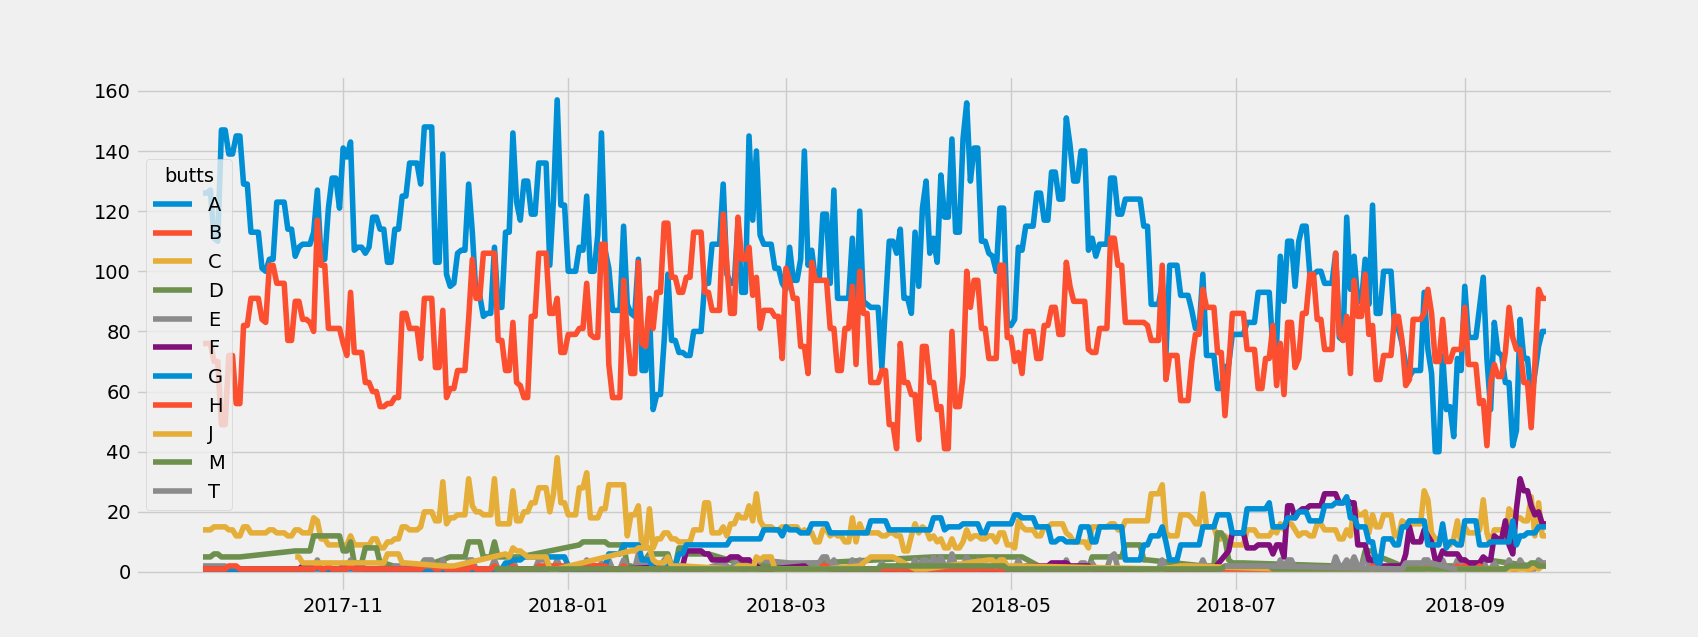

In [395]:
#df2_gb_car = df2.groupby('Car_type')
df_gb2 = df_clean2.groupby('Car_type')

fig, ax = plt.subplots()

#for car in df2_gb_car:
#for key,val,dates in zip(df2_gb_car.indices.keys(),df2_gb_car.indices.values(),)
#df2_gb_car.plot(x = 'Date', y = 'count')#,ax= ax)
#df2_gb_car.plot(x = 'Date', y = 'count',ax= ax)
# for car in df2_gb_car.indices.keys():
#     ax.plot(df2_gb_car.get_group(car)['Date'],df2_gb_car.get_group(car)['count'], label = car)
for car in df_gb2.indices.keys():
    ax.plot(df_gb2.get_group(car)['Date'],df_gb2.get_group(car)['count'], label = car)

    #ax.plot(x = , y = val, label = key)
leg = ax.legend()
#leg = ax.legend(['A','T','C','J','D','B','H','M'])
leg.set_title("butts")
#leg.set_label()
#ax.plot(data = df2_gb_car[car], x = 'Date', y = 'count' )
#d

In [145]:
len(df_gb_car_type.index.)

2908

In [133]:
df_gb_car_type.

C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.data is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [96]:
#df_gb_car_type['count'] = df_gb_car_type.values
df_gb_car_type.values

array([126,  76,  14, ...,   2,   2,   2], dtype=int64)

In [140]:
df_gb_car_type.index.levels[0]

DatetimeIndex(['2017-09-24', '2017-09-25', '2017-09-26', '2017-09-27',
               '2017-09-28', '2017-09-29', '2017-09-30', '2017-10-01',
               '2017-10-02', '2017-10-03',
               ...
               '2018-09-14', '2018-09-15', '2018-09-16', '2018-09-17',
               '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21',
               '2018-09-22', '2018-09-23'],
              dtype='datetime64[ns]', name='Create Date', length=365, freq=None)

In [125]:
df_gb_car_type.values

2908

In [130]:
df['AAR Car Kind'].value_counts()

A    37450
T    29096
C     5517
H     3479
B     1317
J      980
D      604
F      343
       316
M      264
G      260
E       45
Name: AAR Car Kind, dtype: int64

In [141]:
df_gb_car_type.groupby(df_gb_car_type.index.levels[1])

ValueError: Grouper and axis must be same length

In [94]:
df_gb_car_type2 = df_gb_car_type.groupby('AAR Car Kind').values
df_gb_car_type2

AttributeError: Cannot access attribute 'values' of 'SeriesGroupBy' objects, try using the 'apply' method

In [70]:
df_gb_car_type.values

array([126,  76,  14, ...,   2,   2,   2], dtype=int64)

<IPython.core.display.Javascript object>


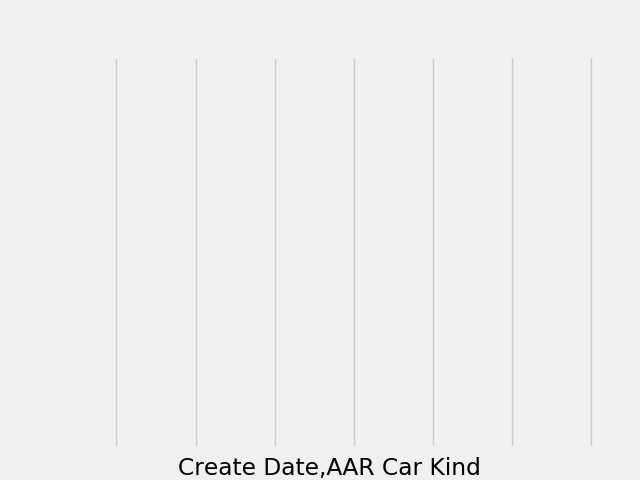

In [61]:
fig, ax = plt.subplots()

df_gb_car_type.plot(kind = 'line')

leg = ax.legend()

<IPython.core.display.Javascript object>


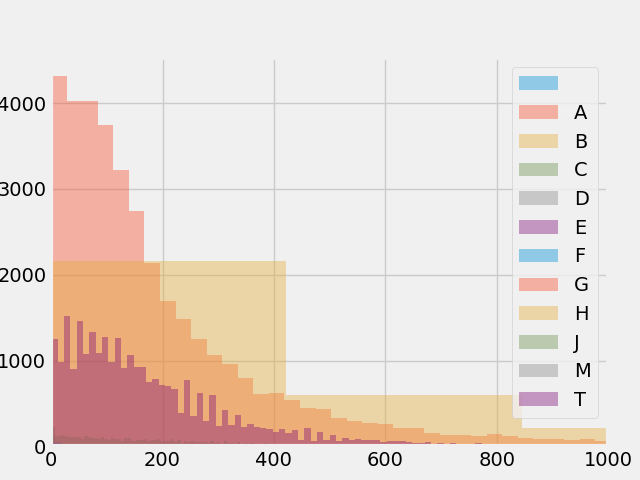

In [39]:
fig, ax = plt.subplots()

df_gb_car_type = df.groupby('AAR Car Kind')['Hours at Station']

#sns.distplot(df_gb_car_type)
df_gb_car_type.plot(kind = 'hist', ax = ax, alpha = 0.4, bins = 200)
ax.set_xlim(0,1000)
leg = ax.legend()

In [44]:
len(df['Create Date'].unique())

365

In [47]:
len(df['Equipment ID'].unique())

2899

In [ ]:
df_gb_car_type = df.groupby('Equipment ID')['Hours at Station']

In [45]:
df['AAR Car Kind'].unique()

array(['B', 'C', 'A', 'D', 'H', ' ', 'G', 'M', 'T', 'F', 'J', 'E'],
      dtype=object)

<IPython.core.display.Javascript object>


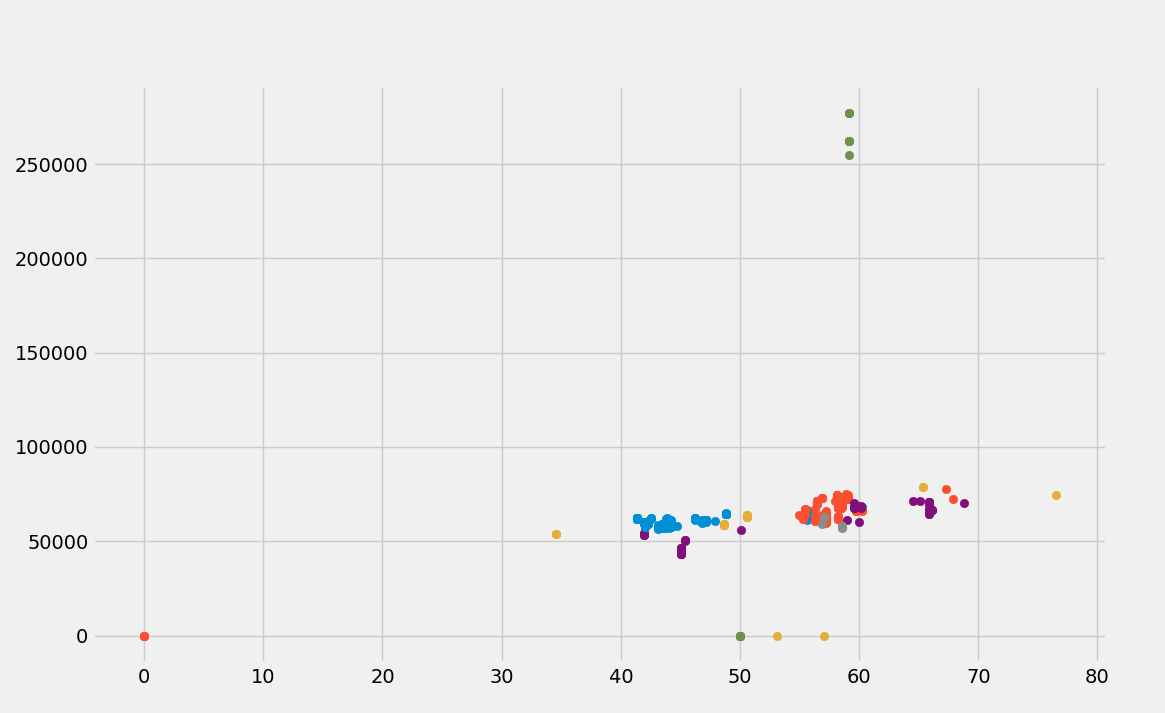

In [42]:
fig, ax = plt.subplots()
df['Length_ft'] = df['Feet']+df['Inches']/12
df['Gross_wt'] = df['Weight']+df['Tare Weight']

df_ds = df[::80]
df_by_types = []
for car_type in df_ds['AAR Car Kind'].unique():
    df_by_types.append(df_ds[df_ds['AAR Car Kind']==car_type])

cp = sns.color_palette()
i=0 
for df_car in df_by_types:
    if i < len(cp):
        ax.scatter(df_car['Length_ft'],df_car['Tare Weight'],color = cp[i])
        i=i+1
    else:
        i=0
        ax.scatter(df_car['Length_ft'],df_car['Tare Weight'],color = cp[i])
        i=i+1

In [ ]:
%matplotlib notebook